In [1]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import utils
import pandas as pd
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.preprocessing import image

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:

X_train.shape

(60000, 28, 28)

In [4]:

X_test.shape


(10000, 28, 28)

In [5]:
single_image= X_train[0]

In [6]:

single_image.shape

(28, 28)

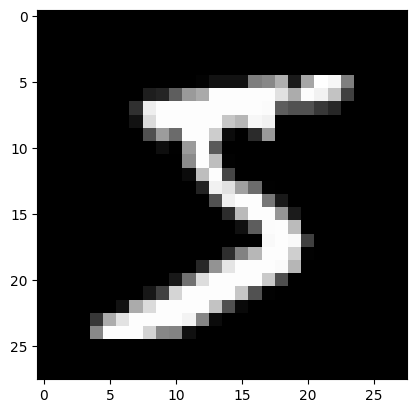

In [7]:
plt.imshow(single_image,cmap='gray')

In [8]:

y_train.shape

(60000,)

In [9]:
X_train.min()
X_train.max()
X_train_scaled = X_train/255.0
X_test_scaled = X_test/255.0
X_train_scaled.min()
X_train_scaled.max()
y_train[0]
y_train_onehot = utils.to_categorical(y_train,10)
y_test_onehot = utils.to_categorical(y_test,10)
type(y_train_onehot)
y_train_onehot.shape


(60000, 10)

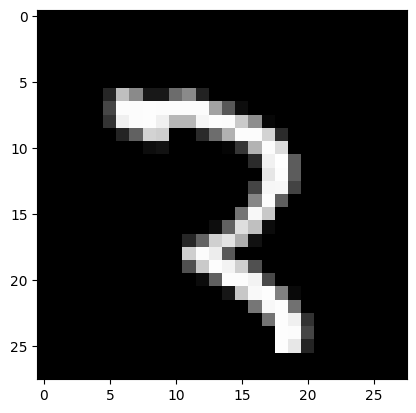

In [10]:
single_image = X_train[500]
plt.imshow(single_image,cmap='gray')
y_train_onehot[500]
X_train_scaled = X_train_scaled.reshape(-1,28,28,1)
X_test_scaled = X_test_scaled.reshape(-1,28,28,1)

In [12]:
model=keras.Sequential()
model.add(layers.Input(shape=(28,28,1)))
model.add(layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(32,activation='relu'))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))


In [13]:

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 16)                86544     
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dense_2 (Dense)             (None, 64)                2112      
                                                        

In [14]:

# Choose the appropriate parameters
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics='accuracy')



In [15]:

model.fit(X_train_scaled ,y_train_onehot, epochs=5,
          batch_size=64,
          validation_data=(X_test_scaled,y_test_onehot))

Epoch 1/5
938/938 [==============================] - 18s 18ms/step - loss: 0.2988 - accuracy: 0.9073 - val_loss: 0.0971 - val_accuracy: 0.9708
Epoch 2/5
938/938 [==============================] - 13s 14ms/step - loss: 0.0888 - accuracy: 0.9732 - val_loss: 0.0733 - val_accuracy: 0.9770
Epoch 3/5
938/938 [==============================] - 14s 15ms/step - loss: 0.0620 - accuracy: 0.9817 - val_loss: 0.0579 - val_accuracy: 0.9815
Epoch 4/5
938/938 [==============================] - 13s 14ms/step - loss: 0.0501 - accuracy: 0.9847 - val_loss: 0.0627 - val_accuracy: 0.9803
Epoch 5/5
938/938 [==============================] - 13s 14ms/step - loss: 0.0420 - accuracy: 0.9869 - val_loss: 0.0671 - val_accuracy: 0.9776


313/313 [==============================] - 1s 3ms/step
[[ 975    0    0    1    0    2    0    0    2    0]
 [   0 1125    1    1    0    1    3    3    1    0]
 [   2    3  993   17    1    0    1    5   10    0]
 [   0    0    0  991    0   16    0    0    3    0]
 [   4    1    2    0  944    0    4    1    5   21]
 [   1    0    0    3    0  885    3    0    0    0]
 [   7    2    0    0    1    5  940    0    3    0]
 [   2    2    9    5    0    0    0 1004    2    4]
 [   3    0    1    2    0   14    1    1  949    3]
 [   5    0    0    5    3   15    0    1   10  970]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.96      0.97      1032
           3       0.97      0.98      0.97      1010
           4       0.99      0.96      0.98       982
           5       0.94      0.99      0.97       892
           6       0.99      0.98  

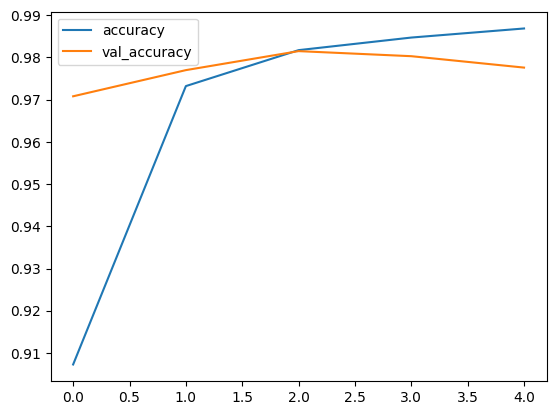

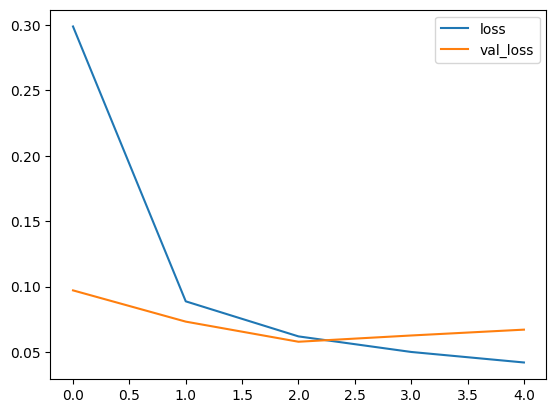

In [16]:
metrics = pd.DataFrame(model.history.history)
metrics.head()
metrics[['accuracy','val_accuracy']].plot()
metrics[['loss','val_loss']].plot()
x_test_predictions = np.argmax(model.predict(X_test_scaled), axis=1)
print(confusion_matrix(y_test,x_test_predictions))
print(classification_report(y_test,x_test_predictions))

1/1 [==============================] - 0s 31ms/step
[8]


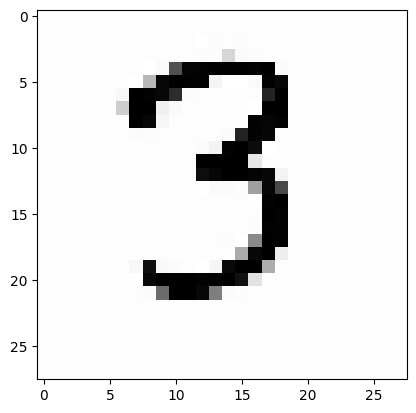

In [20]:
img = image.load_img('d1.jpeg')
type(img)
img = image.load_img('d1.jpeg')
img_tensor = tf.convert_to_tensor(np.asarray(img))
img_28 = tf.image.resize(img_tensor,(28,28))
img_28_gray = tf.image.rgb_to_grayscale(img_28)
img_28_gray_scaled = img_28_gray.numpy()/255.0
x_single_prediction = np.argmax(
    model.predict(img_28_gray_scaled.reshape(1,28,28,1)),
     axis=1)
print(x_single_prediction)
plt.imshow(img_28_gray_scaled.reshape(28,28),cmap='gray')

In [21]:
img_28_gray_inverted = 255.0-img_28_gray
img_28_gray_inverted_scaled = img_28_gray_inverted.numpy()/255.0
x_single_prediction = np.argmax(
    model.predict(img_28_gray_inverted_scaled.reshape(1,28,28,1)),
     axis=1)
print(x_single_prediction)


1/1 [==============================] - 0s 15ms/step
[3]
